<a href="https://colab.research.google.com/github/gourab-sinha/Machine_Learning/blob/master/Twitter%20Sentiment%20Analysis/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Twitter Sentiment Analysis

In [0]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [0]:
def update_to_string(info):
  return str(info)
training_data = pd.read_csv("/content/training_twitter_x_y_train.csv",delimiter=',',encoding="utf8")
test_data = pd.read_csv("/content/test_twitter_x_test.csv",delimiter=",",encoding="utf8")
training_data.rename(columns={"airline_sentiment": "Target"},inplace = True)
training_data.drop(['tweet_id','name','tweet_coord','tweet_created','airline_sentiment_gold','negativereason_gold'],inplace=True,axis=1)
test_data.drop(['tweet_id','name','tweet_coord','tweet_created','airline_sentiment_gold','negativereason_gold'],inplace=True,axis=1)

columns = training_data.columns
for i in columns:
  training_data[i] = training_data[i].apply(update_to_string)
  training_data[i] = training_data[i].replace('nan',"")
  if i!="Target":
    test_data[i] = test_data[i].apply(update_to_string)
    test_data[i] = test_data[i].replace('nan',"")




In [0]:
training_data['Doc'] = ""
test_data['Doc'] = ""
for i in columns:
  if i != 'Target':
    training_data['Doc'] = training_data['Doc']+str(" ")+training_data[i]
    test_data['Doc'] = test_data['Doc']+str(" ")+test_data[i]

# Drop Columns
for i in columns:
  if i!="Target" and i!="Doc":
    training_data.drop([i],axis=1,inplace=True)
    test_data.drop([i],axis=1,inplace=True)

In [5]:
vocab = []
def get_words(text):
  global vocab
  words = text.split(" ")
  vocab+=words
  return text
training_data['Doc'].apply(get_words)


0         Southwest 0 @SouthwestAir I am scheduled for ...
1         Southwest 0 @SouthwestAir seeing your workers...
2         United 0 @united Flew ORD to Miami and back a...
3         Southwest 0 @SouthwestAir @dultch97 that's ho...
4         United 0 @united so our flight into ORD was d...
                               ...                        
10975      American 0 @AmericanAir followback ohio,panama 
10976     United 0 @united thanks for the help. Wish th...
10977     US Airways 0 @usairways the. Worst. Ever. #dc...
10978     US Airways 0 @nrhodes85: look! Another apolog...
10979     United 1 @united you are by far the worst air...
Name: Doc, Length: 10980, dtype: object

In [0]:
characters_not_required = "[#/-/\"/=/+/“/”/*/-/👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

def get_clean_words(word):
  clean_words = []
  for word in vocab:
    if word=="":
      continue;
    else:
      word = re.sub(characters_not_required, "", word)
      if len(word)!=0:
        clean_words.append(word.lower())
  return clean_words

words = get_clean_words(vocab) 

In [7]:
len(words)

263982

In [0]:
freq = nltk.FreqDist(words).most_common(1500)

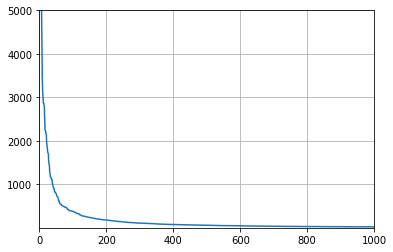

In [9]:
answer1=[]
answer2=[]
for i in range(len(freq)):
    answer1.append(i)
    answer2.append(freq[i][1])
plt.plot(answer1,answer2)
plt.axis([0,1000,1,5000])
plt.grid()
plt.show()

In [10]:
freq = freq[:600]
features = [ i[0] for i in freq]
features

['0',
 'us',
 'to',
 'time',
 'united',
 'canada',
 '&',
 'the',
 'i',
 'a',
 'you',
 'for',
 'on',
 'flight',
 'eastern',
 'and',
 'my',
 'usairways',
 'americanair',
 'airways',
 'is',
 'american',
 'in',
 'southwest',
 'southwestair',
 'jetblue',
 'delta',
 'of',
 'central',
 'me',
 'it',
 'your',
 'have',
 'was',
 'not',
 'with',
 'at',
 'no',
 'that',
 'this',
 'get',
 'but',
 'pacific',
 'from',
 'be',
 'can',
 'are',
 'thanks',
 'new',
 'cancelled',
 'we',
 'now',
 'just',
 'an',
 'service',
 'do',
 'so',
 'help',
 '1',
 'been',
 '-',
 'customer',
 'up',
 'quito',
 'will',
 '2',
 'they',
 'out',
 "i'm",
 'our',
 'hours',
 'what',
 'york',
 'when',
 'how',
 '&amp;',
 'if',
 'hold',
 'all',
 'thank',
 'flights',
 'plane',
 'there',
 'still',
 'why',
 'one',
 'ny',
 'need',
 'would',
 'america',
 'gate',
 'please',
 'back',
 'had',
 'or',
 "can't",
 'virgin',
 'atlantic',
 'delayed',
 'call',
 'virginamerica',
 'flightled',
 'bag',
 'about',
 'hour',
 'as',
 'has',
 'got',
 'after'

In [11]:
x_train = training_data['Doc'].values
y_train = training_data['Target'].values
x_test = test_data['Doc'].values

def get_feature_clean_word(sentence):
  words = sentence.split(" ")
  clean_words = []
  for word in words:
    if word!="":
      clean_words.append(word)
      # word = re.sub(characters_not_required, "", word)
      # if len(word)!=0:
        # clean_words.append(word.lower())
  return " ".join(clean_words)

for i in range(len(x_train)):
  x_train[i] = get_feature_clean_word(x_train[i])

for i in range(len(x_test)):
  x_test[i] = get_feature_clean_word(x_test[i])

x_test


array(["American 0 @AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do? Texas Central Time (US & Canada)",
       'American 0 @AmericanAir after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs. College Station, TX Central Time (US & Canada)',
       "Southwest 1 @SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow. CT Eastern Time (US & Canada)",
       ...,
       'Virgin America 1 Nice RT @VirginAmerica: The man of steel might be faster, but we have WiFi – just saying. #ScienceBehindTheExperience http://t.co/FGRbpAZSiX Worldwide Caracas',
       'American 0 @AmericanAir Aww Thanks AA..DFW was on GMA up here this AM..so i understand ..Btw A.A is my Airline when im able to trv..Love you guys.:) East Coast CT. Central Time (US & Canada)',
       'United 0 @united the loun

In [0]:
count_vec = CountVectorizer(max_features=1500)
x_train_feature,x_test_feature,y_train_transform,y_test_transform = train_test_split(x_train,y_train)

In [0]:
x_train_transform = count_vec.fit_transform(x_train_feature)
x_test_transform = count_vec.transform(x_test_feature)
# print(count_vec.get_feature_names())
# x_train_transform.todense()

In [14]:
svc = SVC()
svc.fit(x_train_transform,y_train_transform)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svc.score(x_test_transform,y_test_transform)

0.7927140255009107

In [0]:
test_transform = count_vec.transform(x_test)

In [0]:
y_predicted = svc.predict(test_transform)

In [18]:
for i in y_predicted:
  print(i)

negative
negative
negative
negative
positive
negative
neutral
negative
negative
negative
negative
negative
negative
negative
negative
negative
positive
neutral
positive
neutral
positive
negative
negative
negative
negative
negative
negative
negative
neutral
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
neutral
negative
negative
positive
negative
neutral
negative
negative
neutral
negative
neutral
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
positive
positive
positive
negative
neutral
negative
negative
negative
neutral
positive
negative
negative
negative
negative
negative
neutral
negative
negative
negative
negative
negative
neutral
negative
neutral
negative
positive
negative
neutral
negative
negative
positive
neutral
neutral
neutral
negative
negative
negative
positive
negative
negative
neutral
positive
negative
negative
negative
negative
negative
negative
neutral
po

In [0]:
np.savetxt("Y_predicted.csv",y_predicted,delimiter=',',fmt='%s')